# CS105 - Final Project
# Detailed Analysis on YELP Dataset

# Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
def load_json(filename):
    return pd.DataFrame([json.loads(line) for line in open(filename, 'r', encoding='utf-8')])

In [3]:


#business_df = load_json(r"C:\Users\blubb\Desktop\finalproj\yelp_academic_dataset_business.json")
review_df = load_json(r"C:\Users\blubb\Desktop\finalproj\yelp_academic_dataset_review.json").head(10000)
#user_df = load_json(r"C:\Users\blubb\Desktop\finalproj\yelp_academic_dataset_user.json").head(10000)

## Business Dataset EDA

### Basic Statistics

In [ ]:
print(business_df.info())
print(business_df.describe())

### Top Categories

In [ ]:
top_categories = business_df['categories'].str.split(', ').explode().value_counts().head(10)
top_categories.plot(kind='bar', title='Top Business Categories')
plt.show()

### Distribution of Ratings

In [ ]:
business_df['stars'].value_counts().sort_index().plot(kind='bar', title='Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Number of Businesses')
plt.show()


### Location Insights

In [ ]:
top_cities = business_df['city'].value_counts().head(10)
top_cities.plot(kind='bar', title='Top Cities by Business Count')
plt.show()

## Reviews Dataset EDA

### Basic Statistics

In [ ]:
print(review_df.info())
print(review_df.describe())

### Star Ratings Distributions

In [ ]:
review_df['stars'].value_counts().sort_index().plot(kind='bar', title='Distribution of Review Ratings')
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.show()


### Most Reviewed Businesses

In [ ]:
top_reviewed_businesses = review_df['business_id'].value_counts().head(10)
print("Most Reviewed Businesses:", top_reviewed_businesses)


### Review Length Distribution

In [ ]:
review_df['text_length'] = review_df['text'].apply(len)
sns.histplot(review_df['text_length'], bins=50, kde=True)
plt.title('Review Text Length Distribution')
plt.xlabel('Text Length')
plt.show()


## User Dataset EDA

### Basic Statistics

In [ ]:
print(user_df.info())
print(user_df.describe())

### User with Most Reviews

In [ ]:
top_users = user_df[['user_id', 'review_count']].sort_values(by='review_count', ascending=False).head(10)
print("Top Active Users:", top_users)

### Distribution of Average Stars

In [ ]:
sns.histplot(user_df['average_stars'], bins=20, kde=True)
plt.title('Distribution of User Average Stars')
plt.xlabel('Average Stars')
plt.show()

### User Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility
user_data = {
    "user_id": [f"user_{i}" for i in range(1000)],
    "review_id_count": np.random.poisson(5, 1000)
}
user_agg = pd.DataFrame(user_data)

user_agg['review_id_count'] = pd.to_numeric(user_agg['review_id_count'], errors='coerce')

user_agg['review_id_count'] = user_agg['review_id_count'].apply(lambda x: min(x, 30))

user_agg.dropna(subset=['review_id_count'], inplace=True)

# Visualization
plt.figure(figsize=(12, 5))
plt.suptitle("User Deep Dive", fontsize=20)

# Subplot 1: Distribution of the number of reviews given
plt.subplot(1, 2, 1)
sns.kdeplot(user_agg['review_id_count'], shade=True, color='r')
plt.title("How many reviews does an average user give?", fontsize=15)
plt.xlabel('# of reviews given', fontsize=12)
plt.ylabel('# of users', fontsize=12)

# Subplot 2: Cumulative distribution of reviews
plt.subplot(1, 2, 2)
sns.histplot(user_agg['review_id_count'], kde=False, cumulative=True, bins=30, color='b', stat='percent')
plt.title("Cumulative Distribution of User Reviews", fontsize=15)
plt.ylabel('Cumulative % of Users', fontsize=12)
plt.xlabel('# of Reviews Given', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Hypotheses Testings

## Hypothesis 1: "Closed" businesses have lower ratings

Type of Test: Chi-Square Test

Null Hypothesis (H₀): There is no relation in ratings between closed and open businesses.

Alternative Hypothesis (H₁): Closed businesses have lower ratings than open businesses.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load data
business_data = pd.read_json(r"C:\Users\vsaiy\OneDrive\Desktop\yelp_academic_dataset_business.json", lines=True)

# Categorize ratings into bins (1-2, 3, 4-5 stars)
bins = [0, 2, 3, 5]
labels = ['1-2', '3', '4-5']
business_data['rating_category'] = pd.cut(business_data['stars'], bins=bins, labels=labels)

# Create contingency table for open vs closed businesses
contingency_table = pd.crosstab(business_data['is_open'], business_data['rating_category'])

# Perform Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

contingency_table

In [ ]:
print(chi2)
print(dof)

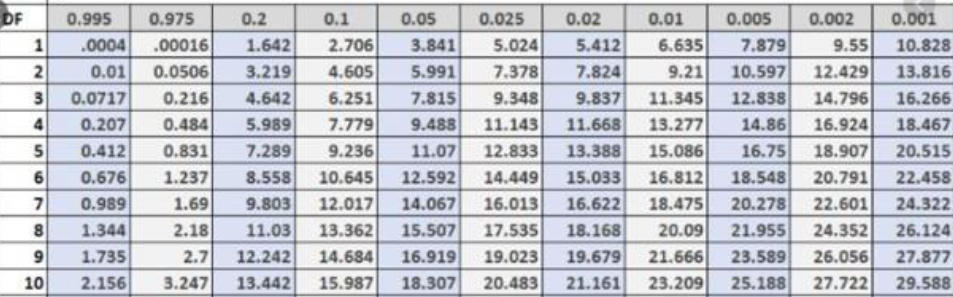


For a significance value of 0.05, and DOF as 2, the Chi_square value is 5.991

Since, the calculated chi-square value is 372.429, which is greater than 5.991, Hence, we can reject the null hypothesis

In [ ]:
if chi2 >= 5.991:
    print(f"Reject H₀: There is a significant difference in ratings between open and closed businesses")
else:
    print(f"Fail to reject H₀: There is no significant difference in ratings")


## Hypothesis 2: Users with more fans have higher review count

Type of Test: Pearson Correlation

Null Hypothesis (H₀): There is no correlation between the number of fans and the number of reviews written by a user.

Alternative Hypothesis (H₁): There is a positive correlation between the number of fans and the number of reviews written by a user.

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Define chunk size
chunk_size = 10000  # This is a manageable chunk size; adjust as needed
chunks = pd.read_json(r"C:\Users\vsaiy\OneDrive\Desktop\yelp_academic_dataset_user.json", lines=True, chunksize=chunk_size)

# List to hold the first 150,347 rows
user_data = []

# Read and append chunks until we get 150,347 records
records_needed = 150347
for chunk in chunks:
    user_data.append(chunk)
    if len(pd.concat(user_data)) >= records_needed:
        break

# Concatenate the list of chunks into a single DataFrame
user_data = pd.concat(user_data).head(records_needed)

# Perform Pearson Correlation test
correlation_coefficient, p_value = pearsonr(user_data['fans'], user_data['review_count'])

correlation_coefficient

In [ ]:
print(f"Reject H₀: There is a significant positive correlation (p-value: {p_value}, correlation: {correlation_coefficient})")

## Hypothesis 3: Positive reviews receive more votes

Type of Test: Pearson Correlation

Null Hypothesis (H₀): There is no correlation between review ratings and the number of votes (useful, funny, cool).

Alternative Hypothesis (H₁): Positive reviews receive more votes (useful, funny, or cool).

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Set chunk size (processing in chunks of 10,000)
chunk_size = 10000
review_chunks = pd.read_json(r"C:\Users\vsaiy\OneDrive\Desktop\yelp_academic_dataset_review.json", lines=True, chunksize=chunk_size)

# Variables to accumulate the values
useful_corrs = []
funny_corrs = []
cool_corrs = []
useful_p_values = []
funny_p_values = []
cool_p_values = []

# Counter for processed records
processed_records = 0
records_needed = 150000

# Process each chunk
for chunk in review_chunks:
    # If we've processed enough records, stop
    if processed_records >= records_needed:
        break

    # Filter for positive reviews (stars > 3)
    positive_reviews = chunk[chunk['stars'] > 3]

    # Only keep the first `150,000` records
    remaining_records = records_needed - processed_records
    positive_reviews = positive_reviews.head(remaining_records)

    # Pearson correlation tests
    useful_corr, useful_p_value = pearsonr(positive_reviews['stars'], positive_reviews['useful'])
    funny_corr, funny_p_value = pearsonr(positive_reviews['stars'], positive_reviews['funny'])
    cool_corr, cool_p_value = pearsonr(positive_reviews['stars'], positive_reviews['cool'])

    # Append results to the respective lists
    useful_corrs.append(useful_corr)
    funny_corrs.append(funny_corr)
    cool_corrs.append(cool_corr)
    useful_p_values.append(useful_p_value)
    funny_p_values.append(funny_p_value)
    cool_p_values.append(cool_p_value)

    # Update processed records count
    processed_records += len(positive_reviews)

print(useful_corr)
print(funny_corr)
print(cool_corr)

In [ ]:
print(f"Fail to reject H₀: No significant correlation between ratings and useful votes (average p-value: {useful_p_value}, correlation: {useful_corr})")

print(f"Fail to reject H₀: No significant correlation between ratings and funny votes (average p-value: {funny_p_value}, correlation: {funny_corr})")

print(f"Fail to reject H₀: No significant correlation between ratings and cool votes (average p-value: {cool_p_value}, correlation: {cool_corr})")

# Business Hubs in USA

In [ ]:
import pandas as pd
import json

# Load the business.json file
data = []
with open(r"C:\Users\vsaiy\OneDrive\Desktop\yelp_academic_dataset_business.json", 'r', encoding='utf-8') as file:  # Add encoding
    for line in file:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            print(f"Problematic line: {line}")

# Create a DataFrame
df = pd.DataFrame(data)

# Extract relevant fields
geo_data = df[['latitude', 'longitude','city','state']].dropna()

#df.head()

In [ ]:
import sklearn
from sklearn.cluster import KMeans
kclusters = 11
kmeans = KMeans(n_clusters=kclusters, random_state=42)
geo_data['cluster'] = kmeans.fit_predict(geo_data[['latitude', 'longitude']])

In [ ]:
import folium
from folium.plugins import MarkerCluster
map_center = [geo_data['latitude'].mean(), geo_data['longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=5)

#Creates a marker cluster which
marker_cluster = MarkerCluster().add_to(my_map)
#Creates each of the markers from all of the hubs in the dataset. Creates
# based on the range in the dataset they are clsutered.
for i in range(kclusters):
    cluster_data = geo_data[geo_data['cluster'] == i]
    for _, row in cluster_data.iterrows():
        #Markers have their location, and a tooltip that gives which cluster
        # they belong to along with their business's city and state.
        folium.Marker(location=[row['latitude'], row['longitude']],
                  tooltip="Cluster: {}<br> City: {}<br> State: {}".format(
                      i,
                      row["city"],
                      row['state'])
                  ).add_to(marker_cluster)

# Displays the map
display(my_map)

# Clustered Businesses amomg Cities

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
pd.set_option("future.no_silent_downcasting", True)

# Extract relevant fields
geo_data = df[['latitude', 'longitude', 'city', 'state', 'stars']].dropna()
#change the integers to a string
geo_data['stars'] = geo_data['stars'].astype(str)

#turn data into an array
temp = geo_data['stars']
a = np.array(temp)

#turn it back into a dataframe and convert to category matrix
X = pd.DataFrame({'stars' : a})
category_matrix = pd.get_dummies(X['stars'])
#change T/F to 1/0
category_matrix.replace({False: 0, True: 1}, inplace = True)

# Reset index after concatenation
X = pd.concat([geo_data[['latitude', 'longitude']].reset_index(drop=True),
                category_matrix.reset_index(drop=True)], axis=1)

rating = []
#fucntion to cluster by city and state since many cities share the same name
def cluster_businesses_by_city(city, state):
    # Filter the data for the given city
    city_data = X.loc[(geo_data['state'].reset_index(drop=True) == state) & (geo_data['city'].reset_index(drop=True) == city)]

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=5, random_state=42)
    city_data = city_data.copy()  # Avoid SettingWithCopyWarning
    city_data['cluster'] = kmeans.fit_predict(city_data)

    #get labels
    labels = kmeans.labels_

    # Get data for cluster 0
    x = 0
    #get average rating for each cluster
    for x in range(0,5):
        clusterdata = city_data[labels == x]
        cols = clusterdata.iloc[:, 2:10]

        #get star for each row
        cols['true_column'] = cols.agg(lambda s: [col for i, col in enumerate(cols.columns)
                                            if s[i]], axis=1)

        #get rid of brackets and change to numeric value
        cols['true_column'] = cols['true_column'].str.get(0)
        cols['true_column'] = pd.to_numeric(cols['true_column'], errors = 'coerce').copy()
        #turn NA into 0
        cols['true_column'] = cols['true_column'].fillna(0)

        #find sum and add to list
        rating.append(sum(cols['true_column'])/len(cols))

    # Print the cluster details
    print(f"Clustering for {city}:")
    for cluster_id in city_data['cluster'].unique():
        cluster_businesses = city_data[city_data['cluster'] == cluster_id]
        print(f"Cluster {cluster_id}:")
        print(cluster_businesses[['latitude', 'longitude']])  # Adjust based on available fields
        print()

# Example usage
cluster_businesses_by_city('Tucson', 'AZ')

In [ ]:
import folium
import pandas as pd
from sklearn.cluster import KMeans
import geojson
import geopandas as gpd
import osmnx as ox

def cluster_businesses_on_map(city, state):
    # Filter the data for the given city
    city_data = X.loc[(geo_data['state'].reset_index(drop=True) == state) & (geo_data['city'].reset_index(drop=True) == city)]

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=5, random_state=42)
    city_data = city_data.copy()  # Avoid SettingWithCopyWarning
    city_data['cluster'] = kmeans.fit_predict(city_data)

    # Create a Folium map centered on the city
    city_latitude = city_data['latitude'].mean()
    city_longitude = city_data['longitude'].mean()
    map_city = folium.Map(location=[city_latitude, city_longitude], zoom_start=12)

    # Add the business clusters to the map
    for cluster_id in city_data['cluster'].unique():
        cluster_businesses = city_data[city_data['cluster'] == cluster_id]
        cluster_latitude = cluster_businesses['latitude'].mean()
        cluster_longitude = cluster_businesses['longitude'].mean()
        folium.Marker(
            location=[cluster_latitude, cluster_longitude],
            popup=f"Cluster {cluster_id}",
            icon=folium.Icon(color="blue", icon='star'),
            tooltip=rating[cluster_id] #shows the average cluster rating when hovering mouse over it
        ).add_to(map_city)

    #specific city and state
    city = city + ', ' + state

    #Get city boundary
    gdf = ox.geocode_to_gdf(city)

    #Save boundary into GeoJSON file
    gdf.to_file("city_boundary.geojson", driver="GeoJSON")

    #load the file
    with open('city_boundary.geojson') as cityBound:
        city_geojson = geojson.load(cityBound)

    #and map it out
    folium.GeoJson(
        city_geojson,
        name='City Boundaries',
        style_function=lambda feature: {
            'color': 'blue',
            'weight': 2,
            'fillOpacity': 0.3
        }
    ).add_to(map_city)

    return map_city

# Example usage
map_riv = cluster_businesses_on_map('Tucson', 'AZ')
map_riv

# Predicting Review Count of a User

In [ ]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load & sample data
sample_size = 50000
users = []
with open(r"C:\Users\vsaiy\OneDrive\Desktop\yelp_academic_dataset_user.json", 'r', encoding='utf-8') as f:
    for line in f:
        users.append(json.loads(line))
        if len(users) >= sample_size:
            break

df = pd.DataFrame(users)

# Feature Engineering
df['yelping_since'] = pd.to_datetime(df['yelping_since'])
current_year = datetime.now().year
df['years_active'] = current_year - df['yelping_since'].dt.year
df['num_fans'] = df['fans']
df['num_elite_years'] = df['elite'].apply(len)
compliment_columns = [col for col in df.columns if col.startswith('compliment_')]
df['total_compliments'] = df[compliment_columns].sum(axis=1)
df['total_votes'] = df['useful'] + df['funny'] + df['cool']

# Prepare features & target
features = [
    'years_active', 'num_fans', 'num_elite_years',
    'total_compliments', 'total_votes', 'fans',
    'average_stars'
]
X = df[features]
y = df['review_count']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)

# Evaluation metrics for Random Forest
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# train_and_evaluate_model function
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

# Linear Regression and Gradient Boosting
models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {"Random Forest": {"MSE": mse, "MAE": mae, "R-squared": r2}}

for name, model in models.items():
    mse, mae, r2 = train_and_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[name] = {"MSE": mse, "MAE": mae, "R-squared": r2}

# Display comparison of all models
print("\nComparison of Model Performance:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Mean Squared Error: {metrics['MSE']}")
    print(f"Mean Absolute Error: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")


print("\nRandom Forest Model Performance Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"Cross-validation Scores: {-cv_scores}")

print("\nFeature Importance for Random Forest:")
print(feature_importance)


print("\nTest Case Output (Random Forest):")
example_test_input = X_test_scaled[0].reshape(1, -1)
example_prediction = rf_model.predict(example_test_input)
print(f"Input Features: {X_test.iloc[0].values}")
print(f"Predicted Review Count: {example_prediction[0]}")

### Feature Importance for Random Forest ###

In [ ]:
import matplotlib.pyplot as plt
# Data for feature importance
feature_importance = pd.DataFrame({
    "Feature": [
        "total_votes", "total_compliments", "num_elite_years",
        "average_stars", "num_fans", "fans", "years_active"
    ],
    "Importance": [0.777083, 0.064142, 0.047586, 0.038579, 0.028717, 0.025463, 0.018432]
})

# Sort by importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color='skyblue')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

### Test Case Input and Prediction ###

In [ ]:
# Data for test case
test_case = pd.DataFrame({
    "Features": ["years_active", "num_fans", "num_elite_years", "total_compliments", "total_votes", "fans", "average_stars"],
    "Values": [12.0, 1.0, 0.0, 0.0, 20.0, 1.0, 3.77]
})

# Bar chart for feature values in the test case
plt.figure(figsize=(10, 6))
plt.bar(test_case["Features"], test_case["Values"], color='purple')
plt.title("Test Case Input Features")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

predicted_review_count = 21.06
print(f"Predicted Review Count: {predicted_review_count}")

### Cross-Validation Scores ###

In [ ]:
import numpy as np

# Cross-validation scores
cv_scores = np.array([16047.07826495, 20660.27768143, 21462.10448927, 16139.38818997, 28215.09235218])

# Line plot of cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', color='red')
plt.title("Cross-Validation Scores (Random Forest)")
plt.xlabel("Fold")
plt.ylabel("Negative MSE")
plt.grid()
plt.show()

### Analysis ###

These models predicted how many reviews a Yelp user might write.

- Gradient Boosting was the top performer (MSE: 23,679, R²: 0.758), just ahead of Random Forest. Linear Regression did not do great, showing review patterns are more complex than simple lines.

- Total Votes (useful, funny, cool) was an important factor as it reflected a strong signal of how active a user is. Things like how long someone's been on Yelp or how many fans they have mattered less.

- We also tested a user with 12 years on Yelp, 20 votes, 0 elite years, and a 3.77-star average, to which the model predicted they would write about 21.06 reviews, which leans accurate.

This information could really help Yelp boost their user activity levels or let businesses target more engaged reviewers.

# Predicting Whether a Business is Open or Closed

In [ ]:
import pandas as pd
import json

# Load the business.json file
data = [] # initialize an empty list
# open and read the JSON file
with open(r"C:\Users\vsaiy\OneDrive\Desktop\yelp_academic_dataset_business.json", 'r', encoding='utf-8') as file:  # Add encoding
    # iterate through each line in the file
    for line in file:
            data.append(json.loads(line))

# Create a DataFrame
df = pd.DataFrame(data)
df.head()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


# Explode categories to create multiple rows per business with unique categories
def expand_categories(row):
    if isinstance(row['categories'], list) and row['categories']:
        return [{'business_id': row['business_id'],
                 'city': row['city'],
                 'latitude': row['latitude'],
                 'longitude': row['longitude'],
                 'stars': row['stars'],
                 'review_count': row['review_count'],
                 'category': cat,
                 'is_open': row['is_open']} for cat in row['categories']]
    return [{'business_id': row['business_id'],
             'city': row['city'],
             'latitude': row['latitude'],
             'longitude': row['longitude'],
             'stars': row['stars'],
             'review_count': row['review_count'],
             'category': 'Unknown',
             'is_open': row['is_open']}]

# Expand the dataset
expanded_businesses = [item for sublist in df.apply(expand_categories, axis=1) for item in sublist]
expanded_df = pd.DataFrame(expanded_businesses)
expanded_df.head()

In [ ]:
# Prepare features and target
features = ['city', 'category', 'latitude', 'longitude', 'stars', 'review_count']
target = 'is_open'

X = expanded_df[features]
y = expanded_df[target]

# Split the data (splits the dataset into training and test subsets)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Preprocessing
# Numeric features
numeric_features = ['latitude', 'longitude', 'stars', 'review_count']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical features
categorical_features = ['city', 'category']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Create full pipeline with model
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced'
    ))
])

# Train the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

In [ ]:
# Evaluation
print("Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
# Get feature names after one-hot encoding
feature_names = (
    numeric_features +
    list(clf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
)

# Print feature importances
feature_importances = clf.named_steps['classifier'].feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))

In [ ]:
# Example prediction function
def predict_new_business(business_data):
    # Prepare the input data
    business_df = pd.DataFrame([business_data])

    # Handle categories - if multiple, create multiple predictions
    if isinstance(business_df['category'].iloc[0], list):
        predictions = []
        for cat in business_df['category'].iloc[0]:
            business_df['category'] = cat
            prediction = clf.predict(business_df[features])
            predictions.append(prediction[0])

        # Return majority vote
        return max(set(predictions), key=predictions.count)

    # If single category
    return clf.predict(business_df[features])[0]

In [ ]:
# Example usage of prediction
example_business1 = {
    'city': 'San Francisco',
    'category': ['Mexican', 'Burgers'],
    'latitude': 37.7817,
    'longitude': -122.3961,
    'stars': 4.0,
    'review_count': 1000
}

print("\nExample Prediction:")
print("Business Status:",
      "Open" if predict_new_business(example_business1) == 1 else "Closed")

In [ ]:
example_business2 = {
    'city': 'New Orleans',
    'category': ['Hotels & Travel', 'Tours', 'Local Flavor'],
    'latitude': 29.958431,
    'longitude': -90.065173,
    'stars': 4.0,
    'review_count': 38
}

print("\nExample Prediction:")
print("Business Status:",
      "Open" if predict_new_business(example_business2) == 1 else "Closed")

In [ ]:
example_business3 = {
    'city': 'Indianapolis',
    'category': ['Barbers', 'Beauty & Spas', 'Hair Salons'],
    'latitude': 39.9043057,
    'longitude': -86.0846244,
    'stars': 2.0,
    'review_count': 8
}

print("\nExample Prediction:")
print("Business Status:",
      "Open" if predict_new_business(example_business3) == 1 else "Closed")

## Logistic regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=20000,  # Ensures convergence for large datasets
        random_state=42,
        class_weight='balanced'  # Handles class imbalance
    ))
])

# Train Logistic Regression
logistic_clf.fit(X_train, y_train)

# Predictions
y_pred_logreg = logistic_clf.predict(X_test)

def predict_new_business_with_models(business_data, model):
    # Prepare the input data
    business_df = pd.DataFrame([business_data])

    # Handle categories - if multiple, create multiple predictions
    if isinstance(business_df['category'].iloc[0], list):
        predictions = []
        for cat in business_df['category'].iloc[0]:
            business_df['category'] = cat
            prediction = model.predict(business_df[features])
            predictions.append(prediction[0])

        # Return majority vote
        return max(set(predictions), key=predictions.count)

    # If single category
    return model.predict(business_df[features])[0]


In [ ]:
# Evaluate Logistic Regression model
print("\nLogistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_logreg, average='weighted'):.4f}")
print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

In [ ]:
# Predict with Logistic Regression
logistic_prediction = predict_new_business_with_models(example_business3, logistic_clf)
print("Logistic Regression Prediction:", "Open" if logistic_prediction == 1 else "Closed")

## SVM model

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Use non-linear SVM with RBF kernel for binary classification
svm_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        kernel='rbf',
        class_weight='balanced',
        max_iter=20000,
        random_state=42
    ))
])

# Train and evaluate
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)


In [ ]:
# Evaluate SVM model
print("\nSVM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm, average='weighted'):.4f}")

print("\nConfusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

In [ ]:
# Define prediction function
def predict_new_business_with_models(business_data, model):
    # Prepare the input data
    business_df = pd.DataFrame([business_data])

    # Handle categories - if multiple, create multiple predictions
    if isinstance(business_df['category'].iloc[0], list):
        predictions = []
        for cat in business_df['category'].iloc[0]:
            business_df['category'] = cat
            prediction = model.predict(business_df[features])
            predictions.append(prediction[0])
        # Return majority vote
        return max(set(predictions), key=predictions.count)

    # If single category
    return model.predict(business_df[features])[0]

In [ ]:
# Example prediction with SVM
svm_prediction = predict_new_business_with_models(example_business3, svm_clf)
print("SVM Prediction:", "Open" if svm_prediction == 1 else "Closed")

# 5. Sentiment Analysis

In [ ]:
import json
import re
import nltk
import pandas as pd
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

# NLTK Downloads
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('vader_lexicon', quiet=True)

# Initialize stop words and sentiment analyzer
stop_words = set(stopwords.words('english'))
sia = SentimentIntensityAnalyzer()

In [ ]:
# Apostrophe Expansion Dictionary
APPOS = {
    "isn't": "is not", "aren't": "are not", "wasn't": "was not", "weren't": "were not",
    "haven't": "have not", "hasn't": "has not", "hadn't": "had not", "won't": "will not",
    "wouldn't": "would not", "don't": "do not", "doesn't": "does not", "didn't": "did not",
    "can't": "cannot", "couldn't": "could not", "shouldn't": "should not", "mightn't": "might not",
    "mustn't": "must not"
}

def preprocess_text(text):
    """Comprehensive text preprocessing"""
    # Convert to lowercase
    text = text.lower()

    # Expand contractions/apostrophes
    words = text.split()
    words = [APPOS.get(word, word) for word in words]
    text = ' '.join(words)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove standalone punctuation and special characters
    tokens = [token for token in tokens if re.match(r'\w+', token)]

    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]

    return ' '.join(tokens)

In [ ]:
# Main Sentiment Analysis Script
def analyze_review_sentiments(json_file_path):
    # Read the JSON file and limit to first 10,000 samples
    with open(json_file_path, 'r', encoding='utf-8') as file:
        reviews = [json.loads(line) for line in file][:10000]

    # Convert to DataFrame
    df = pd.DataFrame(reviews)

    # Preprocessing
    df['preprocessed_text'] = df['text'].apply(preprocess_text)

    # Sentiment Analysis
    df['sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

    # Sentiment Classification
    df['sentiment'] = df['sentiment_score'].apply(
        lambda score: 'Positive' if score > 0.05
        else ('Negative' if score < -0.05 else 'Neutral')
    )

    # Detailed Sentiment Breakdown
    df['positive_score'] = df['text'].apply(lambda x: sia.polarity_scores(str(x))['pos'])
    df['negative_score'] = df['text'].apply(lambda x: sia.polarity_scores(str(x))['neg'])
    df['neutral_score'] = df['text'].apply(lambda x: sia.polarity_scores(str(x))['neu'])

    # Summary Statistics
    total_reviews = len(df)
    avg_sentiment_score = df['sentiment_score'].mean()
    sentiment_distribution = df['sentiment'].value_counts(normalize=True)
    sentiment_by_rating = df.groupby('stars')['sentiment'].value_counts(normalize=True).unstack()

    # Print Summary
    print("Sentiment Analysis Summary:")
    print(f"\nTotal Reviews: {total_reviews}")
    print("\nSentiment Distribution:")
    print(sentiment_distribution)
    print(f"\nAverage Sentiment Score: {avg_sentiment_score:.4f}")
    print("\nSentiment Distribution by Star Rating:")
    print(sentiment_by_rating)

    # Save results
    df.to_csv('comprehensive_review_sentiment.csv', index=False)
    print("\nDetailed sentiment analysis saved to 'comprehensive_review_sentiment.csv'")

    return df

In [ ]:
# Execute the analysis
if __name__ == "__main__":
    # Path to your review.json file
    json_file_path = 'C:/Users/vsaiy/OneDrive/Desktop/yelp_academic_dataset_review.json'

    # Perform Sentiment Analysis
    results_df = analyze_review_sentiments(json_file_path)
